#### Blair Ednie
# Homework 1
## Machine Learning CS-3120-001

## Sources:

- I used parts of the code samples given in the Homework 1 assignment document.

- I used GPT-4 for help with plotting, noted with code comments. I also used GPT-4 for help revising my explanation in #4.

- I was influenced by the approach "Computing the gradient numerically with finite differences" outlined in "CS231n: Convolutional Neural Networks for Visual Recognition" (https://cs231n.github.io/optimization-1/)

- For the Loss Surface Visualization in #3., I adapted my previous plotting code from my Plot_Examples.ipynb.

## Instructions



#### Linear Regression Model

Implement a linear regression model from scratch and plot the loss.

## 1. Import NumPy and Matplotlib

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

### 2. Data samples: given 10 pairs of data samples that are:

```
x_data = np.array([35., 38., 31., 20., 22., 25., 17., 60., 8., 60.])
Y_data= np.array([129.54611622, 135.54611622, 121.54611622, 99.54611622, 103.54611622, 109.54611622, 93.54611622, 179.54611622, 75.54611622, 179.54611622])
```

y_data = 2*x_data+50+5*np.random.random()
X could be within any range, stored as an array (using numpy.array)

In [3]:
x_data = np.array([35., 38., 31., 20., 22., 25., 17., 60., 8., 60.])
y_data = np.array([129.54611622, 135.54611622, 121.54611622, 99.54611622, 103.54611622, 109.54611622, 93.54611622, 179.54611622, 75.54611622, 179.54611622])

### 3. Plot the landscape of the loss function and include the plot in the report.

To plot the Loss Surface, we define ranges for our bias (bb) and weight (ww) and plot Z (loss) over bb and ww using a meshgrid. Then we use plt.contourf(X,Y,Z,levels)--where X is bias, Y is weight, Z loss--to visualize the loss surface. We also locate the minimum loss value (Min Loss Value plot annotation).

The first time I did this the scales of bb to ww produced a plot that was hard to read, so I decided to index the values. We're really interested in the loss surface, so the actual values of bb and ww here are not as important to the visualization.

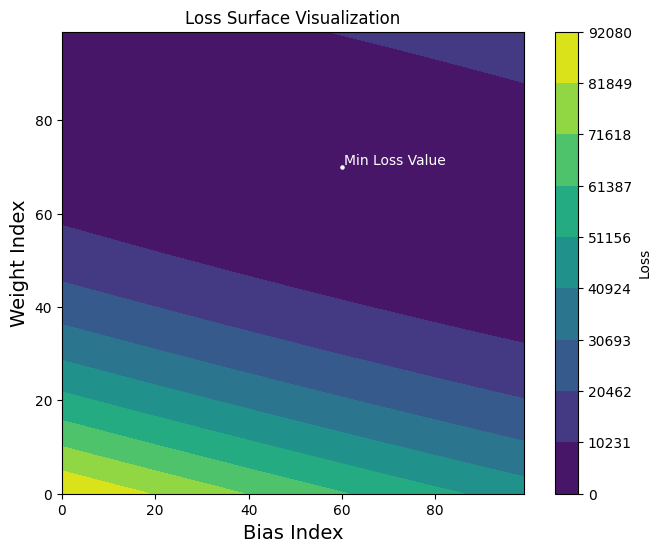

In [4]:
bb = np.arange(0,100,1) # bias
ww = np.arange(-5, 5,0.1) # weight

#for i in range(len(bb)):
#    for j in range(len(ww)):
#        b = bb[i]
#        w = ww[j]
#        Z[j][i] = 0
#        for n in range(len(x_data)):
#            Z[j][i] = Z[j][i] + (w*x_data[n]+b - y_data[n])**2 # this is the loss
#        Z[j][i] = Z[j][i]/len(x_data)

################################################################################
# In the code below, I used GPT-4 to help rework the above to take advantage of np broadcasting

# Reshape bb and ww for broadcasting
# bb: Make it (100, 1, 1) to broadcast along the bias dimension
# ww: Make it (1, 100, 1) to broadcast along the weight dimension
B, W = np.meshgrid(bb, ww)
B = B[:, :, np.newaxis]  # Shape (100, 100, 1) to match with x_data
W = W[:, :, np.newaxis]  # Shape (100, 100, 1) to match with x_data

# x_data and y_data need to be reshaped for broadcasting
# They have shape (10,) originally; reshape them to (1, 1, 10) to broadcast against B and W
x_data_reshaped = x_data[np.newaxis, np.newaxis, :]
y_data_reshaped = y_data[np.newaxis, np.newaxis, :]

# use broadcasting
# The resulting Z will have shape (100, 100), corresponding to each combination of b and w
Z = ((W * x_data_reshaped + B - y_data_reshaped) ** 2).mean(axis=2)

# End of GPT-4 code
################################################################################

# meshgrid
X, Y = np.meshgrid(range(bb.shape[0]), range(ww.shape[0]))

# finding the index of the maximum value in the matrix
min_index = np.unravel_index(np.argmin(Z, axis=None), Z.shape)

# define contour levels
levels_ml = np.linspace(np.min(Z), np.max(Z), 10)

# building the plot
plt.figure(figsize=(8, 6))
plot = plt.contourf(X, Y, Z, levels=levels_ml)
plt.xlabel('Bias Index', fontsize=14)
plt.ylabel('Weight Index', fontsize=14)

# scale x and y axes
plt.axis('scaled')

# add a colorbar
plt.colorbar(label="Loss")

# add a white circle
plt.scatter(X[min_index], Y[min_index], c='w', marker='o', s=5)

# add annotation
plt.annotate("Min Loss Value", xy=(X[min_index], Y[min_index]), xytext=(X[min_index]+0.5, Y[min_index]+0.5), color='w')
plt.draw()

# adding title to the figure
plt.title("Loss Surface Visualization")
plt.show()

### 4. Build a linear regression model that minimizing the loss for the given dataset using “gradient descent” algorithm introduced in lecture2.

$ w_j := w_j - α * \frac{dL}{dw} $

Randomly pick some weights to start the “gradient descent” process.
e.g.
```
b = 0 # initial b
w = 0 # initial w
```

"Explain how your gradient descent process was terminated (e.g. by testing convergence or finishing certain number of iterations) and explain all threshold values you used in your report."

# Gradient descent algorithm
My gradient descent process defined in gradient_descent(...) terminates after a certain number of iterations rather than by a convergence test or gradient magnitude test.

First, we make a guess ("predicted value") and assign it to y_pred. Since it is a linear regression, this prediction is based on the formula w * x_data + b.

For each iteration, before updating b and w, we need to compute gradients with respect to w and b, grad_w and grad_b. Using the loss function from above, $L$, based on Mean Squared Error, we can take the partial derivative with respect to $w$ and $b$:  

- "grad_w = (2/len(x_data)) * np.dot(x_data, (y_pred - y_data))" implements the formula $ grad_w = \frac{2}{N} ∑ (x_i \cdot (y_{pred,i} - y_{data,i})) $ where $N$ is the number of data points. This is the partial derivative of the loss function $L$ with respect to the weight $w$.

- "grad_b = (2/len(x_data)) * np.sum(y_pred - y_data)" implements the formula
$ grad_b = \frac{2}{N} ∑(y_{pred,i} - y_{data,i})$ where $N$ is the number of data points. This is the partial derivative of the loss function $L$ with respect to the bias $b$.

Now that we have $\frac{dL}{dw}$ and $\frac{dL}{db}$, we know which "direction" to go to descend the gradient. The magnitude of these adjustments is determined by the learning rate (α).

For each iteration, we can plug these into the update functions, where α is the learning rate:
$ w := w - α * \frac{dL}{dw}$,
$ b := b - α * \frac{dL}{db}$. These functions update w and b in the direction that minimizes the loss over the dataset, scaled by α.

Finally, to be able to model the gradient descent, for each iteration we save the most-recent $w$ and $b$ to our lists, w_history and b_history.

(I used GPT-4 as a "peer reviewer" to help make sure I explain this clearly.)

# Threshold values

For a given dataset, using the algorithm described above, the only two values that we have direct control over are the learning rate α, and the number of iterations. For this assignment, I chose to run the algorithm until the number of iterations are exhausted. This allowed me to experiment with α to observe the effect of different "step sizes" independently of the number of iterations, which I would not have been able to do with early termination techniques like convergence testing or gradient magnitude testing.

I tried various values of α (.01, .001,...,.00001) and similarly various numbers of iterations (100,1000,...,1000000) to see the effect of each adjustment. Then I was able to compare the results to previous runs, as well as to the Min Loss Value from the Loss Surface we computed in #3.

In [5]:
# gradient descent
# here we wrap the model in a function to make it easier to call with various values of lr and iterations
def gradient_descent(x_data, y_data, b: float, w: float, iterations: int, learning_rate: float, b_history: list, w_history: list):
  for i in range(iterations):
      # predicted value
      y_pred = w * x_data + b

      # compute gradients
      grad_w = (2/len(x_data)) * np.dot(x_data, (y_pred - y_data))
      grad_b = (2/len(x_data)) * np.sum(y_pred - y_data)

      # update parameters
      w = w - learning_rate * grad_w
      b = b - learning_rate * grad_b

      # store parameters in history
      b_history.append(b)
      w_history.append(w)

### 5. Test different values of the learning rate “lr” and different number of iterations/convergence threshold values.
Explain how these values affect your program in your report.
e.g.
```
lr = 0.0001 # example learning rate
iteration = 10000 # example iteration number
```

# Results of training with several values of LR, IT, b, & w

See plots in 6. below.

From running the code cell below, which runs the model defined above with various learning rates and number of iterations, we can see that the model is more sensitive to learning rate and number of iterations than to the starting point.

With the lr_001_it10000 models (plotted in the blue line graphs), we can see that if we go with too high of a learning rate, and too few iterations, the gradient descent path does not show a clear trend toward the min loss.

With lr0001_it1000, we can see that the model is beginning to descend. This made me think about reducing the learning rate (lr/10) and increasing the iterations (it*1000) to see what would happe. These are the black line models, and as we can see, regardless of starting point, these arrive at nearly the same point.

In [6]:
# initial parameters
b = 0  # initial bias
w = 0  # initial weight

# run model with various learning rates and iterations
learning_rate = 0.00001
iterations = 1000000
b_0_history_lr00001_it1000000 = [b]
w_0_history_lr00001_it1000000 = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_0_history_lr00001_it1000000, w_0_history_lr00001_it1000000)

learning_rate = 0.0001
iterations = 1000
b_0_history_lr0001_it1000 = [b]
w_0_history_lr0001_it1000 = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_0_history_lr0001_it1000, w_0_history_lr0001_it1000)

learning_rate = 0.001
iterations = 10000
b_0_history_lr001_it10000 = [b]
w_0_history_lr001_it10000 = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_0_history_lr001_it10000, w_0_history_lr001_it10000)

# initial parameters
b = 5  # initial bias
w = 5  # initial weight

# run model with various learning rates and iterations
learning_rate = 0.00001
iterations = 1000000
b_5_history_lr00001_it1000000 = [b]
w_5_history_lr00001_it1000000 = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_5_history_lr00001_it1000000, w_5_history_lr00001_it1000000)

learning_rate = 0.0001
iterations = 1000
b_5_history_lr0001_it1000 = [b]
w_5_history_lr0001_it1000 = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_5_history_lr0001_it1000, w_5_history_lr0001_it1000)

learning_rate = 0.001
iterations = 10000
b_5_history_lr001_it10000 = [b]
w_5_history_lr001_it10000 = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_5_history_lr001_it10000, w_5_history_lr001_it10000)

# initial parameters
b = 100  # initial bias
w = 100  # initial weight

# run model with various learning rates and iterations
learning_rate = 0.00001
iterations = 1000000
b_100_history_lr00001_it1000000 = [b]
w_100_history_lr00001_it1000000 = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_100_history_lr00001_it1000000, w_100_history_lr00001_it1000000)

learning_rate = 0.0001
iterations = 1000
b_100_history_lr0001_it1000 = [b]
w_100_history_lr0001_it1000 = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_100_history_lr0001_it1000, w_100_history_lr0001_it1000)

learning_rate = 0.001
iterations = 10000
b_100_history_lr001_it10000 = [b]
w_100_history_lr001_it10000 = [w]
gradient_descent(x_data, y_data, b, w, iterations, learning_rate, b_100_history_lr001_it10000, w_100_history_lr001_it10000)

/var/folders/22/hdrqs83s5z94vp_xg1v9l_180000gn/T/ipykernel_34570/3129104170.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - learning_rate * grad_w


### 6. Track the change of the weight values (w and b) from each iteration and plot all the values out.
e.g.
```
# Store parameters for plotting
b_history = [b]
w_history = [w]
# model by gradient descent
#…
b_history.append(b)
w_history.append(w)
#...
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5,color='black')
```

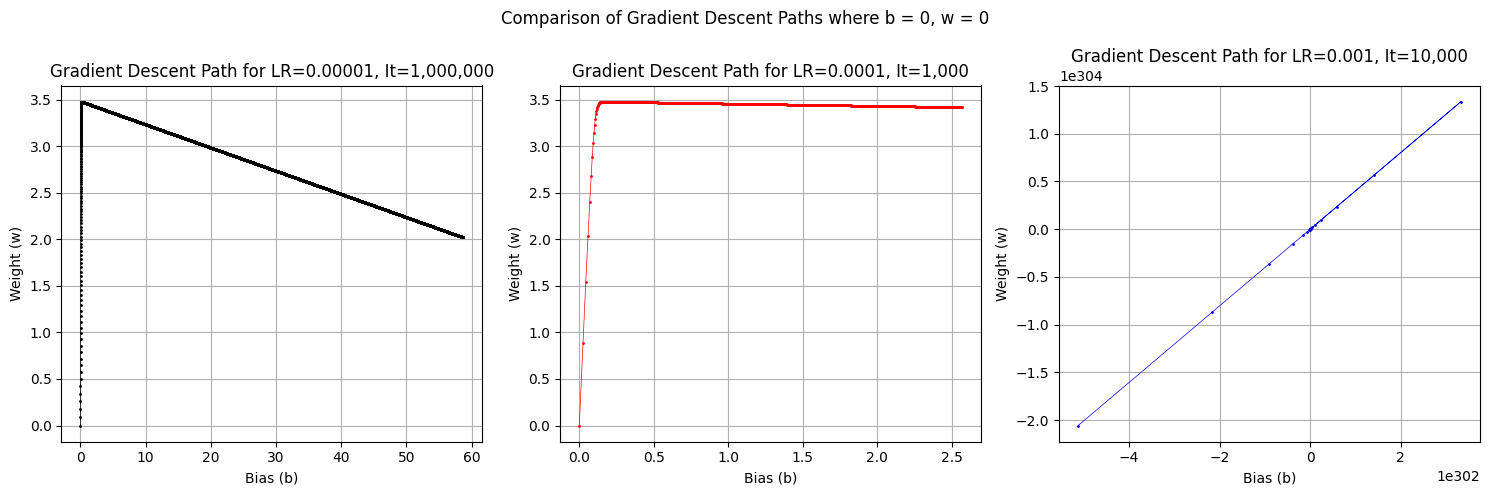

In [7]:
# GPT-4 for help with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparison of Gradient Descent Paths where b = 0, w = 0')

# Plot for LR=0.00001, It=1,000,000 (Black)
axs[0].plot(b_0_history_lr00001_it1000000, w_0_history_lr00001_it1000000, 'o-', ms=1, lw=0.5, color='black')
axs[0].set_title('Gradient Descent Path for LR=0.00001, It=1,000,000')
axs[0].set_xlabel('Bias (b)')
axs[0].set_ylabel('Weight (w)')
axs[0].grid(True)

# Plot for LR=0.0001, It=100,000 (Red)
axs[1].plot(b_0_history_lr0001_it1000, w_0_history_lr0001_it1000, 'o-', ms=1, lw=0.5, color='red')
axs[1].set_title('Gradient Descent Path for LR=0.0001, It=1,000')
axs[1].set_xlabel('Bias (b)')
axs[1].set_ylabel('Weight (w)')
axs[1].grid(True)

# Plot for LR=0.001, It=10,000 (Blue)
axs[2].plot(b_0_history_lr001_it10000, w_0_history_lr001_it10000, 'o-', ms=1, lw=0.5, color='blue')
axs[2].set_title('Gradient Descent Path for LR=0.001, It=10,000')
axs[2].set_xlabel('Bias (b)')
axs[2].set_ylabel('Weight (w)')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

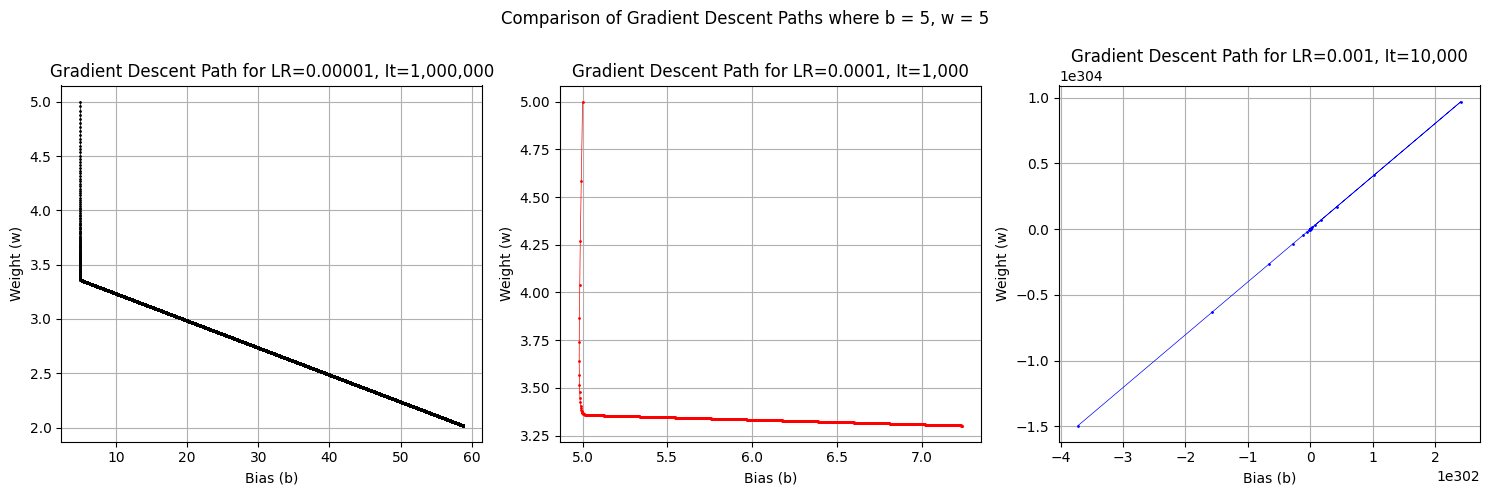

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparison of Gradient Descent Paths where b = 5, w = 5')

# Plot for LR=0.00001, It=1,000,000 (Black)
axs[0].plot(b_5_history_lr00001_it1000000, w_5_history_lr00001_it1000000, 'o-', ms=1, lw=0.5, color='black')
axs[0].set_title('Gradient Descent Path for LR=0.00001, It=1,000,000')
axs[0].set_xlabel('Bias (b)')
axs[0].set_ylabel('Weight (w)')
axs[0].grid(True)

# Plot for LR=0.0001, It=100,000 (Red)
axs[1].plot(b_5_history_lr0001_it1000, w_5_history_lr0001_it1000, 'o-', ms=1, lw=0.5, color='red')
axs[1].set_title('Gradient Descent Path for LR=0.0001, It=1,000')
axs[1].set_xlabel('Bias (b)')
axs[1].set_ylabel('Weight (w)')
axs[1].grid(True)

# Plot for LR=0.001, It=10,000 (Blue)
axs[2].plot(b_5_history_lr001_it10000, w_5_history_lr001_it10000, 'o-', ms=1, lw=0.5, color='blue')
axs[2].set_title('Gradient Descent Path for LR=0.001, It=10,000')
axs[2].set_xlabel('Bias (b)')
axs[2].set_ylabel('Weight (w)')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

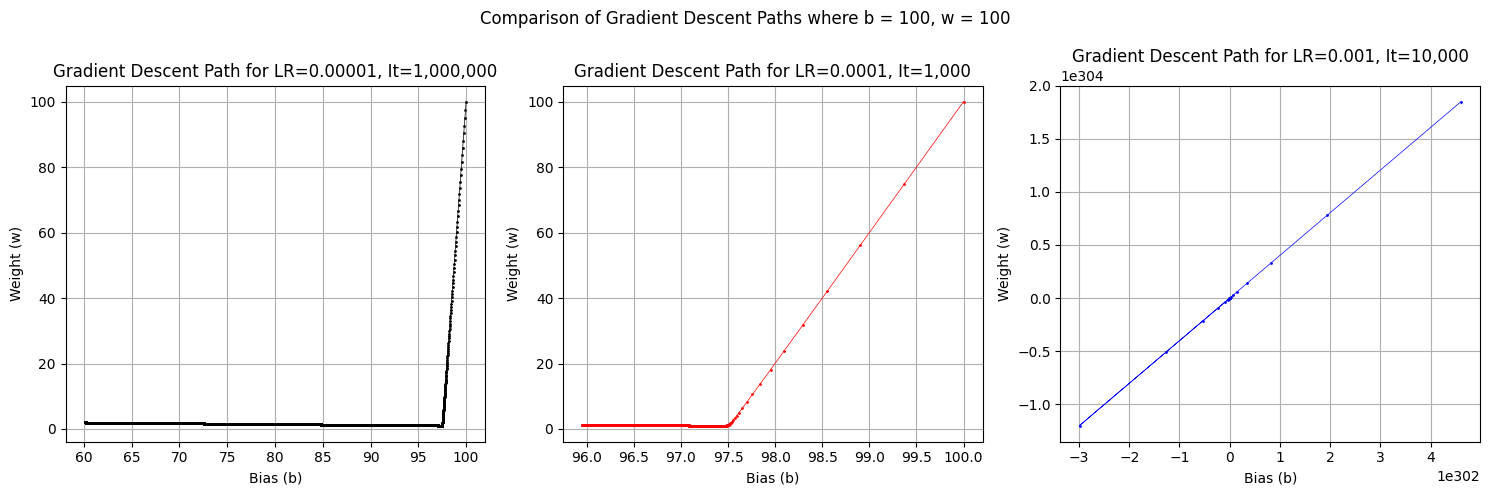

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparison of Gradient Descent Paths where b = 100, w = 100')

# Plot for LR=0.00001, It=1,000,000 (Black)
axs[0].plot(b_100_history_lr00001_it1000000, w_100_history_lr00001_it1000000, 'o-', ms=1, lw=0.5, color='black')
axs[0].set_title('Gradient Descent Path for LR=0.00001, It=1,000,000')
axs[0].set_xlabel('Bias (b)')
axs[0].set_ylabel('Weight (w)')
axs[0].grid(True)

# Plot for LR=0.0001, It=100,000 (Red)
axs[1].plot(b_100_history_lr0001_it1000, w_100_history_lr0001_it1000, 'o-', ms=1, lw=0.5, color='red')
axs[1].set_title('Gradient Descent Path for LR=0.0001, It=1,000')
axs[1].set_xlabel('Bias (b)')
axs[1].set_ylabel('Weight (w)')
axs[1].grid(True)

# Plot for LR=0.001, It=10,000 (Blue)
axs[2].plot(b_100_history_lr001_it10000, w_100_history_lr001_it10000, 'o-', ms=1, lw=0.5, color='blue')
axs[2].set_title('Gradient Descent Path for LR=0.001, It=10,000')
axs[2].set_xlabel('Bias (b)')
axs[2].set_ylabel('Weight (w)')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Visualize gradient descent on loss surface

To help visualize this, we can show the paths for 'LR=0.00001, It=1,000,000' for b=0, w=0 and b=100, w=100 on the Loss Surface Visualization from above. Since that visualization uses indices of b and w instead of actual values, we need to convert the b histories and w histories to indices. I used GPT-4 to help with the conversion.

We can see that, although the starting points are very different, the gradient descent paths arrive at nearly the same point, near the Min Loss Value.  

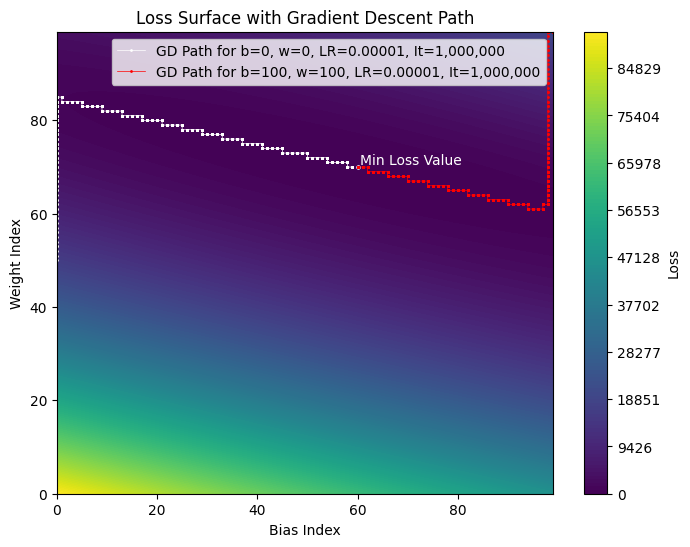

In [10]:
# GPT-4 for help with conversion
# Convert b_history and w_history to their corresponding indices in bb and ww
def value_to_index(values, array):
    indices = [np.abs(array - value).argmin() for value in values]
    return indices
# End of GPT-4 code

b_indices_1 = value_to_index(b_0_history_lr00001_it1000000, bb)
w_indices_1 = value_to_index(w_0_history_lr00001_it1000000, ww)

b_indices_2 = value_to_index(b_100_history_lr00001_it1000000, bb)
w_indices_2 = value_to_index(w_100_history_lr00001_it1000000, ww)

plt.figure(figsize=(8, 6))
levels_ml = np.linspace(np.min(Z), np.max(Z), 128)
plt.contourf(range(bb.shape[0]), range(ww.shape[0]), Z, levels=levels_ml)
plt.colorbar(label="Loss")
plt.plot(b_indices_1, w_indices_1,'o-', ms=1, lw=0.5, color='white',label='GD Path for b=0, w=0, LR=0.00001, It=1,000,000')
plt.plot(b_indices_2, w_indices_2,'o-', ms=1, lw=0.5, color='red',label='GD Path for b=100, w=100, LR=0.00001, It=1,000,000')

# draw min loss from first plot
plt.scatter(X[min_index], Y[min_index], c='w', marker='o', s=5)
plt.annotate("Min Loss Value", xy=(X[min_index], Y[min_index]), xytext=(X[min_index]+0.5, Y[min_index]+0.5), color='w')
plt.draw()

plt.xlabel('Bias Index')
plt.ylabel('Weight Index')
plt.title("Loss Surface with Gradient Descent Path")
plt.legend()
plt.show()

# 7. Bonus
"Compare the prediction result using your model with the given target values (Y values) or any other type of model performance testing."

For this step, we will generate some x_data, then plot the "ground truth" y_true against the models' predictions.  

Since we saved the histories of our gradient descent runs, we can use the last element of the history (e.g., w_100_history_lr0001_it1000[-1]) to access the most up-to-date parameters.

We were given the ground truth function in the assignment, so we can use that to generate data against which to judge the models we generated. To judge the models' performances, we can calculate the mean squared error (MSE) between the values predicted by each model and the ground truth values.

# Discussion of results

From this comparison, the worst model was lr001_it10000 (Blue), which failed to generate valid data (nan). This is likely due to the learning rate being too high, since lr0001_it1000 (Red) produced valid data on fewer iterations.

lr00001_it1000000 (Black) has a much lower MSE than Red, and we can see that it produces a much better prediction of the ground truth.

These results seem to show that, all else being equal, a lower learning rate and more iterations produce a more predictive model.

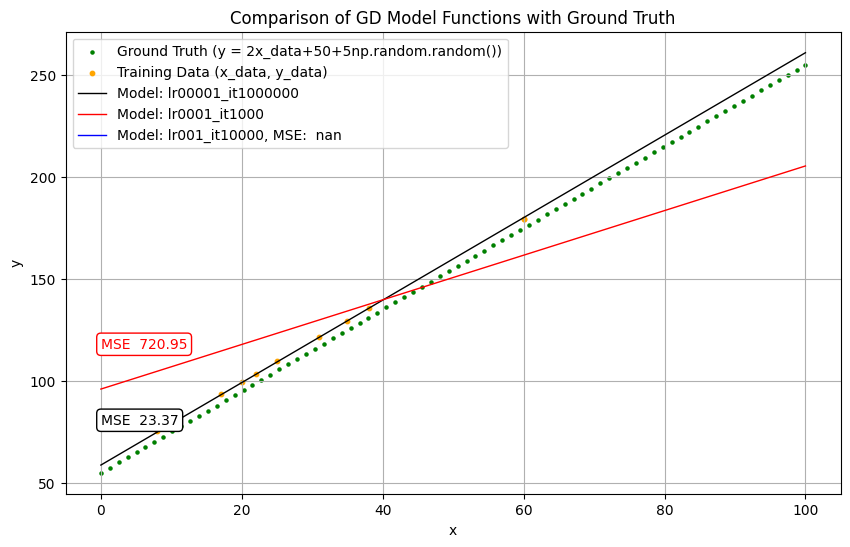

In [11]:
# GPT-4 for plotting help
# generate values of x in the range [0, 80]
x_ = np.linspace(0, 100, 80)

# ground truth function given in assignment
y_true = (2*x_)+50+(5*np.random.random())

# lr00001_it1000000
lr00001_it1000000 = w_0_history_lr00001_it1000000[-1]*x_ + b_0_history_lr00001_it1000000[-1]

# lr0001_it1000
lr0001_it1000 = w_100_history_lr0001_it1000[-1]*x_ + b_100_history_lr0001_it1000[-1]

# lr0001_it1000
lr001_it10000 = w_0_history_lr001_it10000[-1]*x_ + b_0_history_lr001_it10000[-1]

# calculate mean-squared errors
mse_lr00001_it1000000 = np.mean((y_true - lr00001_it1000000)**2)
mse_lr0001_it1000 = np.mean((y_true - lr0001_it1000)**2)
mse_lr001_it10000 = np.mean((y_true - lr001_it10000)**2)

# plot ground truth
plt.figure(figsize=(10, 6))
plt.scatter(x_, y_true, label='Ground Truth (y = 2x_data+50+5np.random.random())', s=5, color='green')

# x_data,y_data
plt.scatter(x_data, y_data, label='Training Data (x_data, y_data)', s=10, color='orange')


# plot gd models
plt.plot(x_, lr00001_it1000000, '-', label='Model: lr00001_it1000000', linewidth=1, color='black')
plt.annotate(f'MSE {mse_lr00001_it1000000: .2f}', xy=(x_[0],lr00001_it1000000[0]), xytext=(x_[0],lr00001_it1000000[0]+20), color='black',\
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', linewidth=1)) # GPT-4 for help with bbox

plt.plot(x_, lr0001_it1000, '-', label='Model: lr0001_it1000', linewidth=1, color='red')
plt.annotate(f'MSE {mse_lr0001_it1000: .2f}', xy=(x_[0],lr0001_it1000[0]), xytext=(x_[0],lr0001_it1000[0]+20), color='red',\
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='red', linewidth=1))

plt.plot(x_, lr001_it10000, '-', label=f'Model: lr001_it10000, MSE: {mse_lr001_it10000: .2f}', linewidth=1, color='blue')
plt.annotate(f'MSE {mse_lr001_it10000: .2f}', xy=(x_[0],lr001_it10000[0]), xytext=(x_[0],lr001_it10000[0]+20), color='blue',\
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='blue', linewidth=1))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of GD Model Functions with Ground Truth')
plt.legend()
plt.grid(True)
plt.show()